In [ ]:
import torch

# using only the raw_with_mean_std data
data = torch.load('.\eeg_cvpr_2017\eeg_cvpr_2017\data\eeg_signals_raw_with_mean_std.pth')

In [8]:
data.keys()

dict_keys(['dataset', 'labels', 'images', 'means', 'stddevs'])

In [9]:
len(data['dataset'])

11965

In [10]:
data['dataset']

[{'eeg': tensor([[    0,     0,     2,  ...,   -37,   -39,   -38],
          [  -12,   -11,    -8,  ...,   -26,   -30,   -33],
          [   35,    29,    21,  ...,   -17,   -12,    -9],
          ...,
          [ -830,  -826,  -838,  ...,  -935,  -956, -1028],
          [ -782,  -848,  -840,  ...,  -951,  -987,  -994],
          [-2656, -2643, -2616,  ..., -2747, -2779, -2786]], dtype=torch.int16),
  'image': 0,
  'label': 10,
  'subject': 4},
 {'eeg': tensor([[ -24,  -27,  -28,  ...,   15,   17,   20],
          [ -26,  -31,  -35,  ...,   25,   27,   31],
          [  23,   29,   34,  ...,  -14,  -16,  -20],
          ...,
          [ 340,  340,  362,  ...,  -74,  -21,   36],
          [ -21,  -20,    8,  ..., -377, -244, -177],
          [ 312,  329,  390,  ...,  -88,   40,  135]], dtype=torch.int16),
  'image': 1,
  'label': 30,
  'subject': 4},
 {'eeg': tensor([[-26, -24, -21,  ..., -16, -16, -18],
          [-20, -20, -17,  ..., -12, -10, -10],
          [ -1,   0,  -2,  ..., -41

In [11]:
data['dataset'][0]

{'eeg': tensor([[    0,     0,     2,  ...,   -37,   -39,   -38],
         [  -12,   -11,    -8,  ...,   -26,   -30,   -33],
         [   35,    29,    21,  ...,   -17,   -12,    -9],
         ...,
         [ -830,  -826,  -838,  ...,  -935,  -956, -1028],
         [ -782,  -848,  -840,  ...,  -951,  -987,  -994],
         [-2656, -2643, -2616,  ..., -2747, -2779, -2786]], dtype=torch.int16),
 'image': 0,
 'label': 10,
 'subject': 4}

In [12]:
(data['dataset'][0]['eeg']).numpy().shape   # 128 channels, num of time steps in each is different for each image

(128, 500)

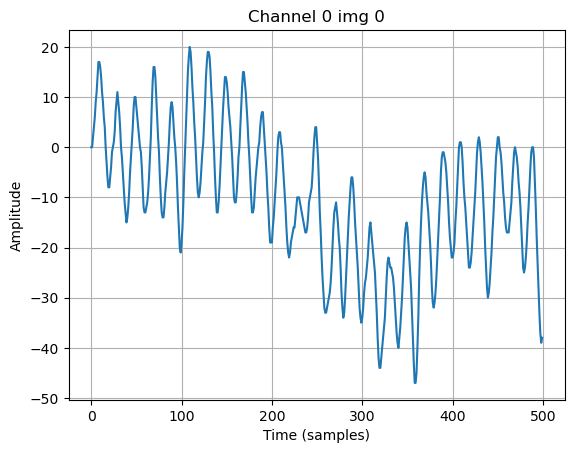

In [13]:
import matplotlib.pyplot as plt

trial = data['dataset'][0]['eeg']
plt.plot(trial[0].numpy())          # for channl 0
plt.title("Channel 0 img 0")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [14]:
data['dataset']

[{'eeg': tensor([[    0,     0,     2,  ...,   -37,   -39,   -38],
          [  -12,   -11,    -8,  ...,   -26,   -30,   -33],
          [   35,    29,    21,  ...,   -17,   -12,    -9],
          ...,
          [ -830,  -826,  -838,  ...,  -935,  -956, -1028],
          [ -782,  -848,  -840,  ...,  -951,  -987,  -994],
          [-2656, -2643, -2616,  ..., -2747, -2779, -2786]], dtype=torch.int16),
  'image': 0,
  'label': 10,
  'subject': 4},
 {'eeg': tensor([[ -24,  -27,  -28,  ...,   15,   17,   20],
          [ -26,  -31,  -35,  ...,   25,   27,   31],
          [  23,   29,   34,  ...,  -14,  -16,  -20],
          ...,
          [ 340,  340,  362,  ...,  -74,  -21,   36],
          [ -21,  -20,    8,  ..., -377, -244, -177],
          [ 312,  329,  390,  ...,  -88,   40,  135]], dtype=torch.int16),
  'image': 1,
  'label': 30,
  'subject': 4},
 {'eeg': tensor([[-26, -24, -21,  ..., -16, -16, -18],
          [-20, -20, -17,  ..., -12, -10, -10],
          [ -1,   0,  -2,  ..., -41

In [15]:
import pandas as pd
df = pd.DataFrame(data['dataset'])

In [16]:
df.head()

,eeg,image,label,subject
0,"[[tensor(0, dtype=torch.int16), tensor(0, dtyp...",0,10,4
1,"[[tensor(-24, dtype=torch.int16), tensor(-27, ...",1,30,4
2,"[[tensor(-26, dtype=torch.int16), tensor(-24, ...",2,29,4
3,"[[tensor(-16, dtype=torch.int16), tensor(-12, ...",3,10,4
4,"[[tensor(-25, dtype=torch.int16), tensor(-21, ...",4,30,4


In [17]:
len(df)

11965

In [18]:
df['subject'].value_counts()

subject
4    1996
6    1996
3    1996
2    1996
5    1996
1    1985
Name: count, dtype: int64

In [19]:
df['label'].value_counts()

label
10    300
15    300
27    300
35    300
19    300
9     300
12    300
4     300
13    300
32    300
30    300
22    300
2     300
14    300
5     300
31    300
36    300
24    300
1     300
16    300
6     300
37    300
29    300
3     300
8     300
11    300
28    300
7     300
38    300
20    300
23    300
0     300
34    300
39    300
17    300
21    300
18    294
25    294
26    294
33    283
Name: count, dtype: int64

In [20]:
type(df['eeg'][0].shape[1])

int

In [21]:
df.isna().any().any() # No NaN values across the entire df, good

False

In [22]:
# check if all have same num of channels
n_ch = []
for eeg in df['eeg']:
    n_ch.append((eeg.shape[0]==128))

sum(n_ch), len(n_ch), len(df)    # if all are same values, then good, all datapoints have all 128 channels 

(11965, 11965, 11965)

In [23]:
df['eeg'][0]

tensor([[    0,     0,     2,  ...,   -37,   -39,   -38],
        [  -12,   -11,    -8,  ...,   -26,   -30,   -33],
        [   35,    29,    21,  ...,   -17,   -12,    -9],
        ...,
        [ -830,  -826,  -838,  ...,  -935,  -956, -1028],
        [ -782,  -848,  -840,  ...,  -951,  -987,  -994],
        [-2656, -2643, -2616,  ..., -2747, -2779, -2786]], dtype=torch.int16)

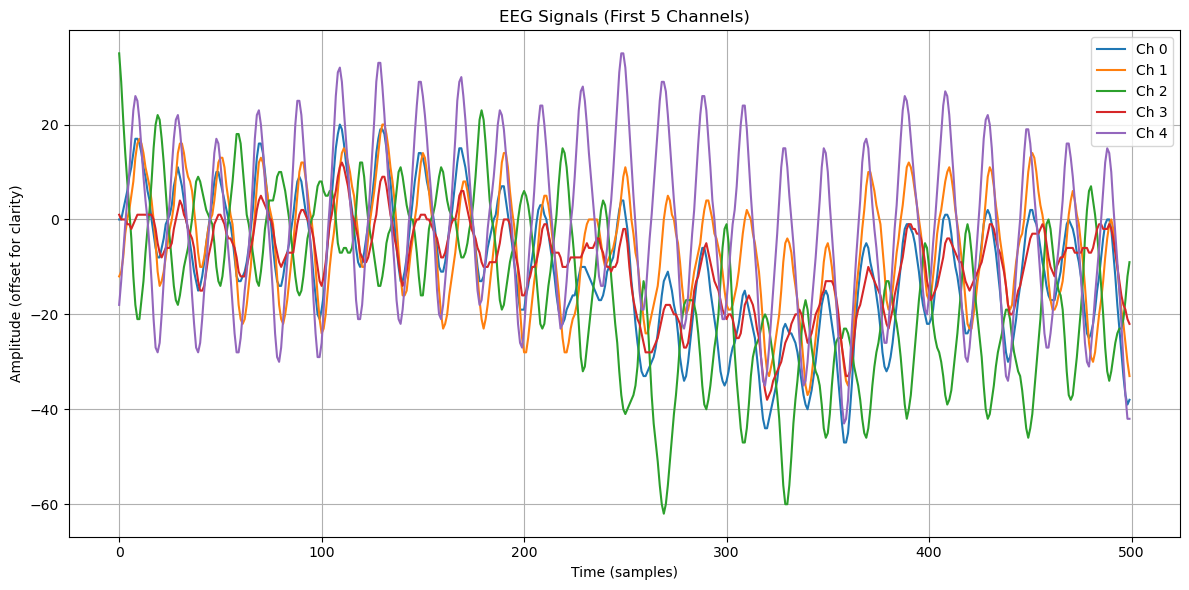

In [58]:
# RAW Data (non-interpolated)
# TODO: CHECK


x = df['eeg'][0]
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(x[i], label=f'Ch {i}')

plt.title("EEG Signals (First 5 Channels)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (offset for clarity)")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# interpolation
import numpy as np
from scipy.interpolate import interp1d

In [26]:
# converting tensors to np arrays
df['eeg'] = df['eeg'].apply(lambda x: x.detach().cpu().numpy() if hasattr(x, 'detach') else x)

In [27]:
df['eeg']

0        [[0, 0, 2, 4, 6, 9, 11, 14, 17, 17, 16, 14, 11...
1        [[-24, -27, -28, -26, -23, -19, -15, -11, -7, ...
2        [[-26, -24, -21, -19, -16, -15, -13, -10, -8, ...
3        [[-16, -12, -7, -1, 3, 7, 9, 8, 6, 4, 1, -1, -...
4        [[-25, -21, -16, -12, -10, -10, -11, -13, -15,...
                               ...                        
11960    [[33, 38, 38, 33, 24, 13, 1, -9, -18, -25, -31...
11961    [[-16, -28, -38, -45, -50, -50, -45, -35, -23,...
11962    [[-11, -22, -32, -41, -48, -54, -56, -53, -46,...
11963    [[-30, -36, -38, -36, -30, -20, -9, 2, 13, 23,...
11964    [[45, 52, 55, 53, 44, 31, 17, 4, -6, -16, -24,...
Name: eeg, Length: 11965, dtype: object

In [28]:
# compute median
lengths = [eeg.shape[1] for eeg in df['eeg']]
median = int(np.median(lengths))
median

511

In [ ]:
# interpolation

epochs = []
for eeg in df['eeg']:
    num_channels, original_len = eeg.shape
    x_original = np.linspace(0, 1, original_len)
    x_target = np.linspace(0, 1, median)
    
    # ipolate each channel
    epoch = np.stack([interp1d(x_original, eeg[ch], kind='linear')(x_target) for ch in range(num_channels)])
    
    epochs.append(epoch)

epochs = np.stack(epochs)


In [30]:
epochs.shape

(11965, 128, 511)

In [31]:
# saving the array for future use
file_path = './data.npy'

np.save(file_path, epochs)

In [32]:
n_epochs, n_channels, n_times = epochs.shape

ch_names = [f"EEG{i}" for i in range(n_channels)]
ch_types = ['eeg'] * n_channels

sfreq = 1000.   # 1 kHz sampling frequency acc to github of the data


info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
mne_epochs = mne.EpochsArray(epochs, info)

Not setting metadata
11965 matching events found
No baseline correction applied
0 projection items activated


In [36]:
mne_epochs

<EpochsArray | 11965 events (all good), 0 – 0.51 s (baseline off), ~5.83 GiB, data loaded,
 '1': 11965>

In [ ]:
# og shape: (n_epochs, n_channels, n_times)
n_epochs, n_channels, n_times = epochs.shape
sfreq = 1000  # actual sampling freq acc to data in the github

data = epochs.transpose(1, 0, 2).reshape(n_channels, -1)  # (n_channels, n_epochs * n_times)

# create mne info
ch_names = [f"EEG{i}" for i in range(n_channels)]
ch_types = ['eeg'] * n_channels
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=128, n_times=6114115
    Range : 0 ... 6114114 =      0.000 ...  6114.114 secs
Ready.


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1651 samples (1.651 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   13.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:   56.0s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


c:\Users\joelj\anaconda3\envs\BCS\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


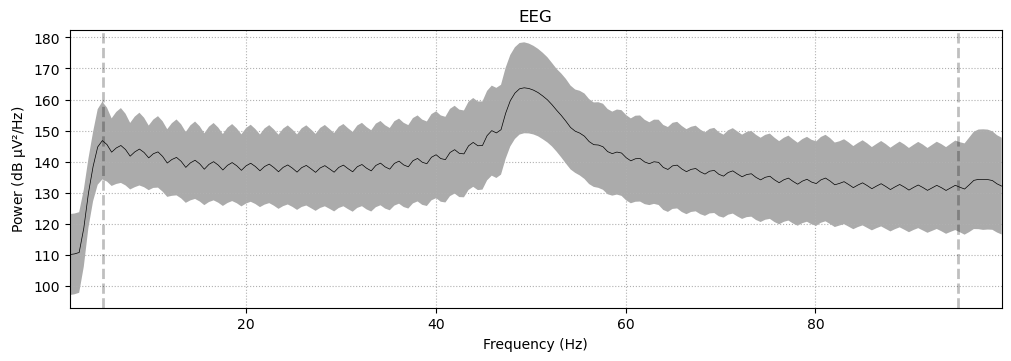

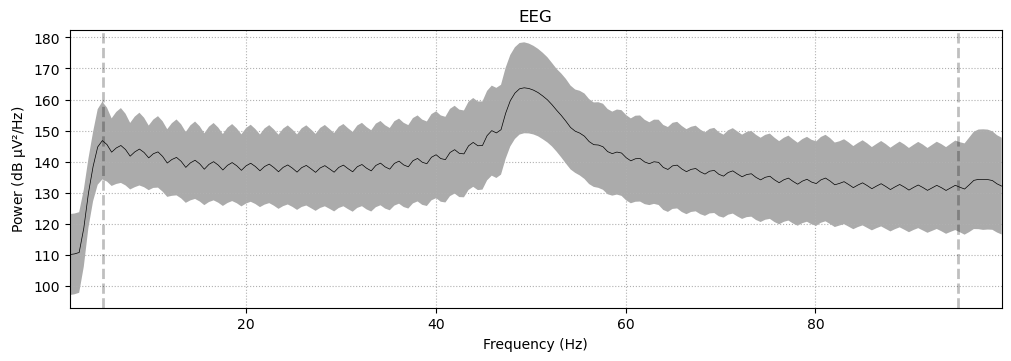

In [ ]:
raw.filter(5., 95.)
raw.plot_psd(fmin=1, fmax=100, average=True)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:   19.5s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


c:\Users\joelj\anaconda3\envs\BCS\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


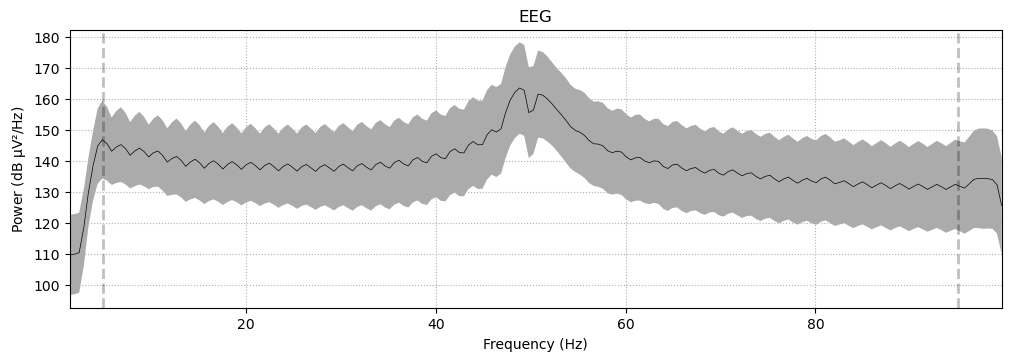

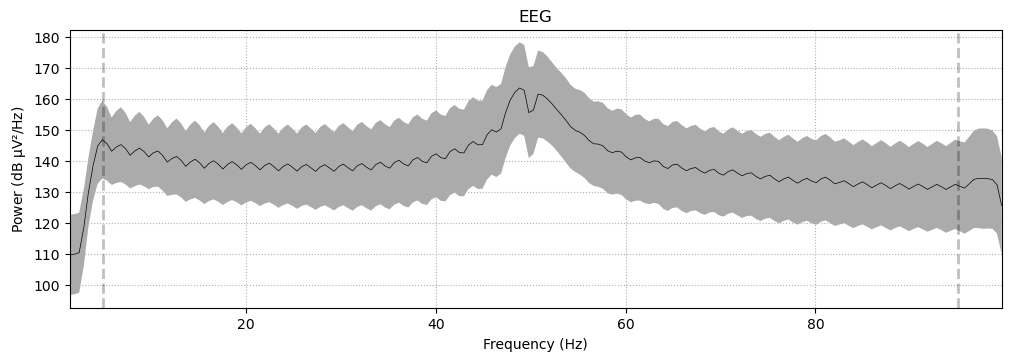

In [44]:
raw.notch_filter(freqs=[50, 100])
raw.plot_psd(fmin=1, fmax=100, average=True)


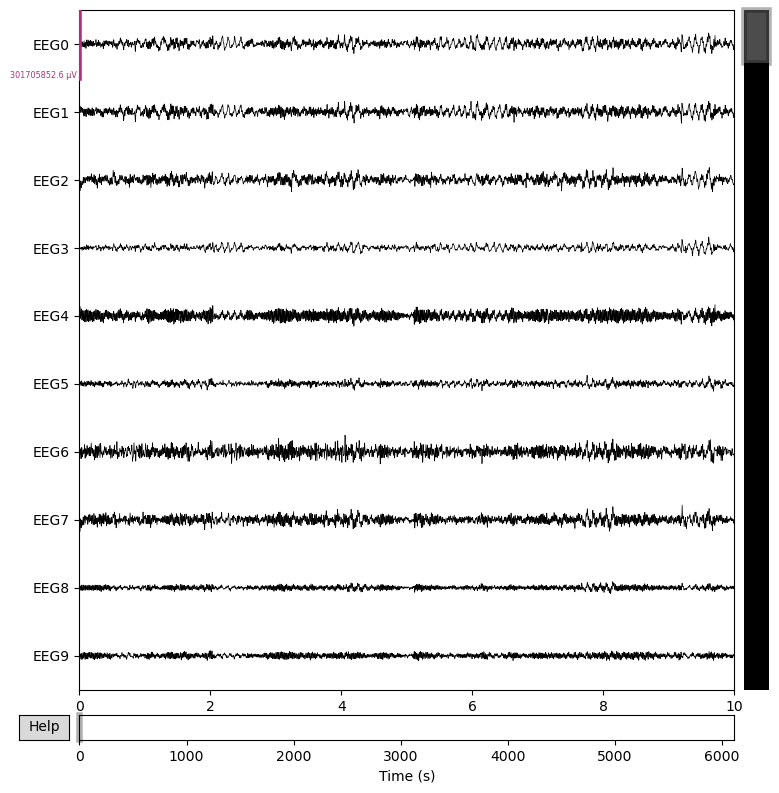

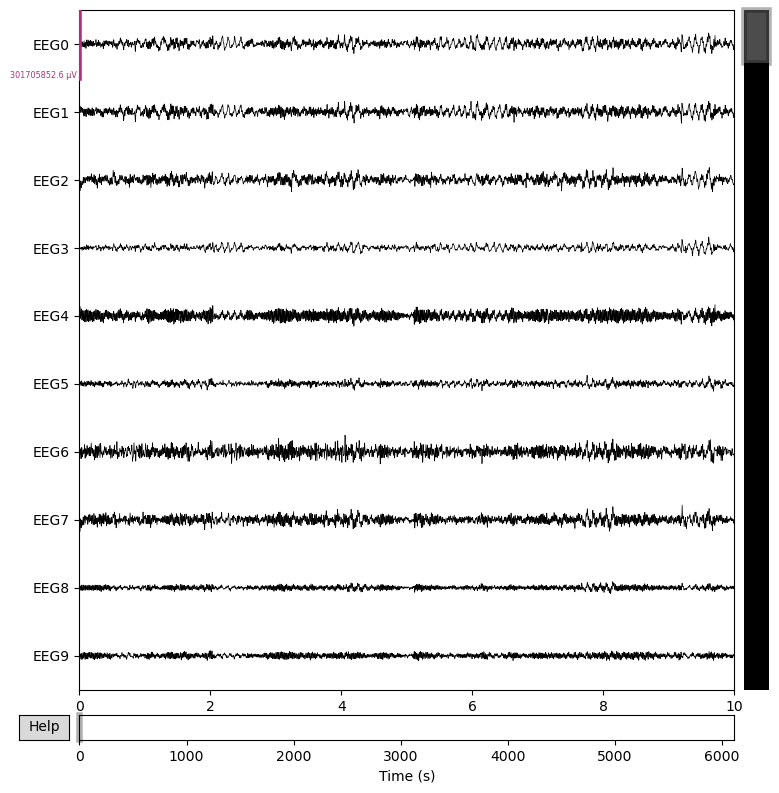

In [ ]:
# first 10 channels
raw.plot(duration=10, scalings='auto', n_channels=10, show_scrollbars=True, title='EEG Data - First 10 Channels')

In [46]:
# segment back into epochs
epochs = mne.make_fixed_length_epochs(raw, duration=(median/sfreq), preload=True)

Not setting metadata
11965 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 11965 events and 511 original time points ...
0 bad epochs dropped


In [51]:
# normalize each epoch (z-score)
data = epochs.get_data()
# data.shape  # (n_epochs, n_channels, n_times)
data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

In [52]:
data.shape

(11965, 128, 511)

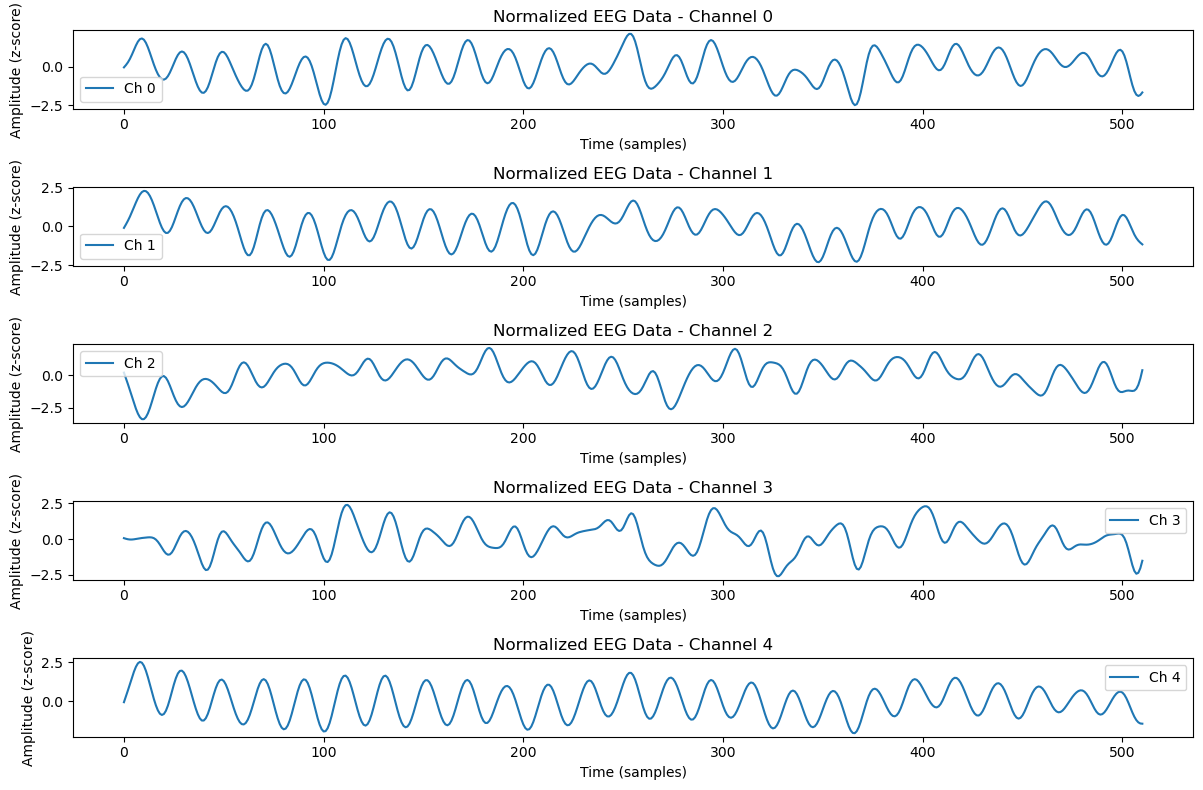

In [ ]:
# visualise 5 channels of the first epoch of the normalized data

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.plot(data[0, i], label=f'Ch {i}')
    plt.legend()
    plt.title(f'Normalized EEG Data - Channel {i}')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


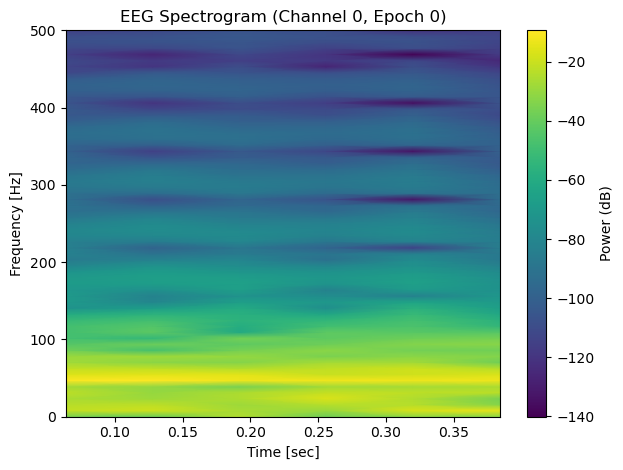

In [ ]:
# NOTE: GPT used, todo understand the code below
# plotting fourier transforms for visualisation # TODO: understand properly
from scipy.signal import spectrogram


signal = data[0, 0, :].reshape(-1)  # (n_times,)
fs = 1000

# Compute spectrogram
f, t, Sxx = spectrogram(signal, fs=fs, nperseg=128, noverlap=64)

plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('EEG Spectrogram (Channel 0, Epoch 0)')
plt.colorbar(label='Power (dB)')
plt.tight_layout()
plt.show()

In [ ]:
# since every epoch has 128 channels, we can skip the padding part
# temporal tokenisation


# split the data into segments of 4 time steps each
n_times = data.shape[2]
n_tokens = n_times // 4
data = data[:, :, :(n_tokens*4)]  # prolly some other better way
data = data.reshape(data.shape[0], data.shape[1], n_tokens, 4)  # (n_epochs, n_channels, n_tokens, 4)


In [ ]:
# TODO: Why isn't this working, what's the correct way to do this?

import torch
import torch.nn as nn

data_tensor = torch.tensor(data, dtype=torch.float32)  # (B, C, T, 4)
B, C, T, F = data_tensor.shape

x = data_tensor.permute(0, 2, 1, 3).reshape(B*T, C, F)  # (B*T, 128, 4)

# Learnable projection
proj = nn.Linear(F, 1024)
x_embed = proj(x)  